In [222]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm

In [306]:
beta = 2
sigma = 4

In [343]:
T = .05
Nt = 15000
Nx = 70
t = np.linspace(0, T, Nt)
x = np.linspace(-3,3,Nx)
X,T = np.meshgrid(x,t)
dx = x[1] - x[0]; dt = t[1] - t[0]
ic = np.exp(-beta*(x)**2)*np.sqrt(beta/np.pi)#+np.exp(-beta*(x+1)**2)*np.sqrt(beta/np.pi)
M = scipy.integrate.trapz(ic, x)
u = np.zeros((Nx, Nt))
u[:,0] = ic

def PME_step(u,j):
    v = u[:,j]**sigma
    dudt = np.zeros_like(u[1:-1,0])
    for i in range(1, Nx-1):
        dudt[i-1] = v[i+1]+v[i-1]-2*v[i]
        
    u[1:-1, j+1] = u[1:-1,j] + dt/dx**2*dudt
    
    #Conservation of mass
    u[0,j+1] = M/dx -np.sum(u[:,j+1])
    
    #periodic BCs
    u[-1,j+1] = u[0,j+1]
    return u

In [344]:
for j in range(Nt-1):
    u = PME_step(u,j)

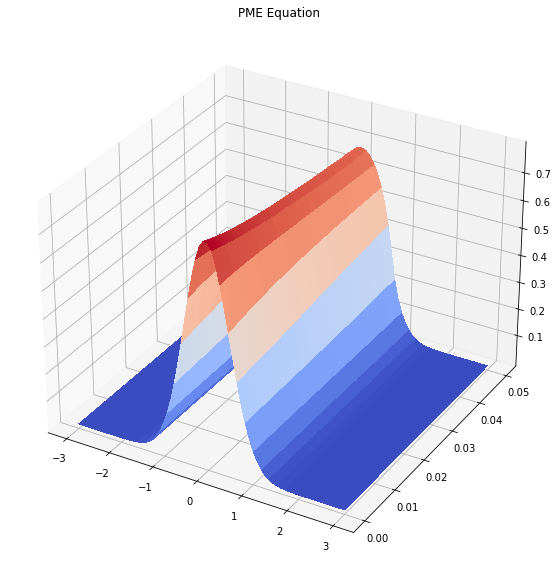

In [345]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('PME Equation')
plt.show()

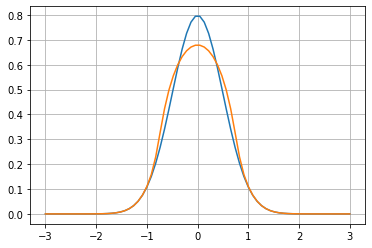

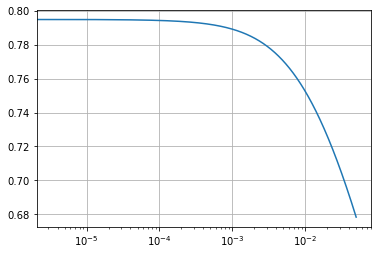

In [346]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.grid()
plt.show()
plt.semilogx(t, np.max(u, axis=0))
#plt.ylim([0, np.max(u)])
plt.grid()

# time dependence

In [282]:
Omega = 2*np.pi
T = .5
Nt = 7000
Nx = 40
t = np.linspace(0, T, Nt)
x = np.linspace(-2,2,Nx)
X,T = np.meshgrid(x,t)
dx = x[1] - x[0]; dt = t[1] - t[0]
ic = np.exp(-beta*x**2)*np.sqrt(beta/np.pi)
M = scipy.integrate.trapz(ic, x)
u = np.zeros((Nx, Nt))
u[:,0] = ic

def D(time):
    return np.cos(Omega*time)

def PME_step_time_dependent(u,j):
    time = t[j]
    v = u[:,j]**4
    dudt = np.zeros_like(u[1:-1,0])
    for i in range(1, Nx-1):
        dudt[i-1] = v[i+1]+v[i-1]-2*v[i]
        
    u[1:-1, j+1] = u[1:-1,j] + D(time)*dt/dx**2*dudt
    
    #Conservation of mass
    u[0,j+1] = M/dx -np.sum(u[:,j+1])
    
    #periodic BCs
    u[-1,j+1] = u[0,j+1]
    return u

In [271]:
for j in range(Nt-1):
    u = PME_step_time_dependent(u,j)

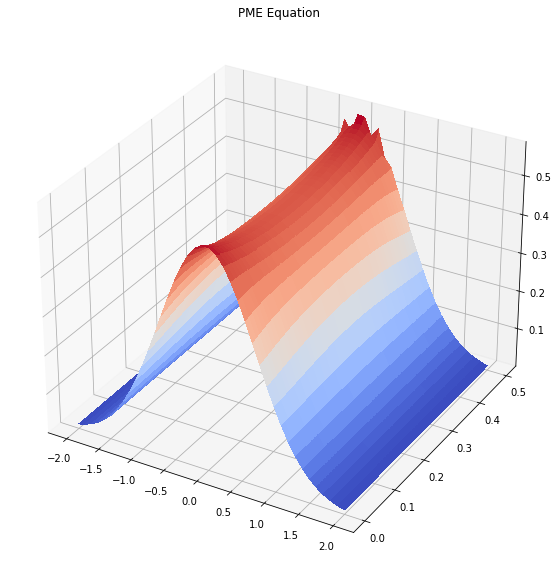

In [272]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('PME Equation')
plt.show()

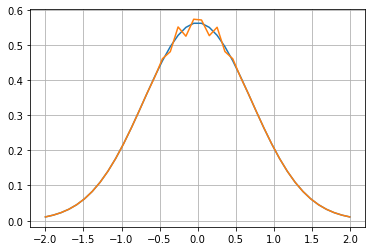

In [273]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.grid()

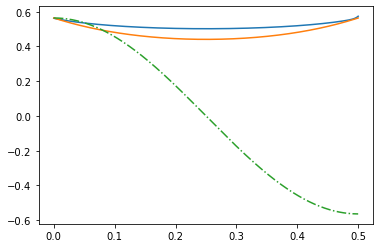

In [277]:
plt.plot(t,np.max(u, axis=0))
plt.plot(t,np.sqrt(beta/np.pi)*1/np.sqrt(4*beta/Omega*np.sin(Omega*t)+1))
plt.plot(t,np.sqrt(beta/np.pi)*np.cos(Omega*t), '-.')

In [275]:
## can not resolve this, either implicit or adaptative stencil. Maybe higher order scheme. 
